Name: Paola Granados 

Labpartner(s): Luz Ballesteros

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
#Set plotting formats
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 6.0]
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.0

# Class 13.2 Machine Learning Continued

#### Announcements

- For the next two weeks we will have virtual workdays from 2-4PM, and you will submit your programming and a weekly project planning and assessment form.
- Reminder **no labs will be accepted after 4/18.** After this you all will be working on your final projects. Please review the syllabus on BB for grading policies. 


# Warmup 13.2

**W.1** Using what you learned in the timeseries lab and practice python exeriese, write a program that asks for a user's birthday and then tells them how old they are.

In [53]:
from datetime import datetime, timedelta
import pandas as pd

In [19]:
bday = pd.Timestamp(input("Input your DOB (YYYY-MM-DD):"))

Input your DOB (YYYY-MM-DD): 1999-08-24


In [34]:
#write program that asks for date 
date = datetime(1999,8,24)
day = date.today() #get today's date 

#convert datetime into a 
day

datetime.datetime(2021, 4, 14, 14, 50, 38, 825603)

In [31]:
print(day)

<built-in method today of type object at 0x00007FF8D1BCB530>


IN CLASS SOLUTION 

In [32]:
date = datetime(1999,8,24)

In [33]:
date.today()

datetime.datetime(2021, 4, 14, 14, 50, 33, 404632)

In [35]:
age = date.today() - date 

In [36]:
age

datetime.timedelta(days=7904, seconds=53463, microseconds=877681)

In [37]:
age.days/365

21.654794520547945

In [38]:
np.floor(age.days/365)


21.0

In [50]:
#input bday information
year = input("What year were you born?")
mo = input("What month were you born?")
day = input("What day were you born?")

What year were you born?1999
What month were you born?8
What day were you born?24


In [55]:
#make inputs into a date time 
bday = datetime(int(year),int(mo),int(day))

datetime.datetime(1999, 8, 24, 0, 0)

In [59]:
#use timedelta to calculate age
age = (bday.today()-bday)
age = age.days/365
print("You are " + str(age) +" years old")

You are 21.665753424657535 years old


**W.2** Amend your program to tell them how old they will turn on their birthday in 2050.

In [64]:
#set a time date for 2050
fut = datetime(2050,12,31)

In [71]:
#calculate age in 2050
age50 = fut - bday
age50 = age50.days/365
age50 = np.floor(age50)
print(" In 2050 you will turn "+str(age50)+" years old")

 In 2050 you will turn 51.0 years old


# Lecture 13.2

## Agenda:
- Machine Learning in Scikit learn continued

## Review

Last time we went through the data sets and the first square in the scikitlearn classifcation example. Let's continue.

## Classification example from scikit-learn
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

Here is the whole code below. We are going to break this example down

C:\Users\Pgran\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pgran\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pgran\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


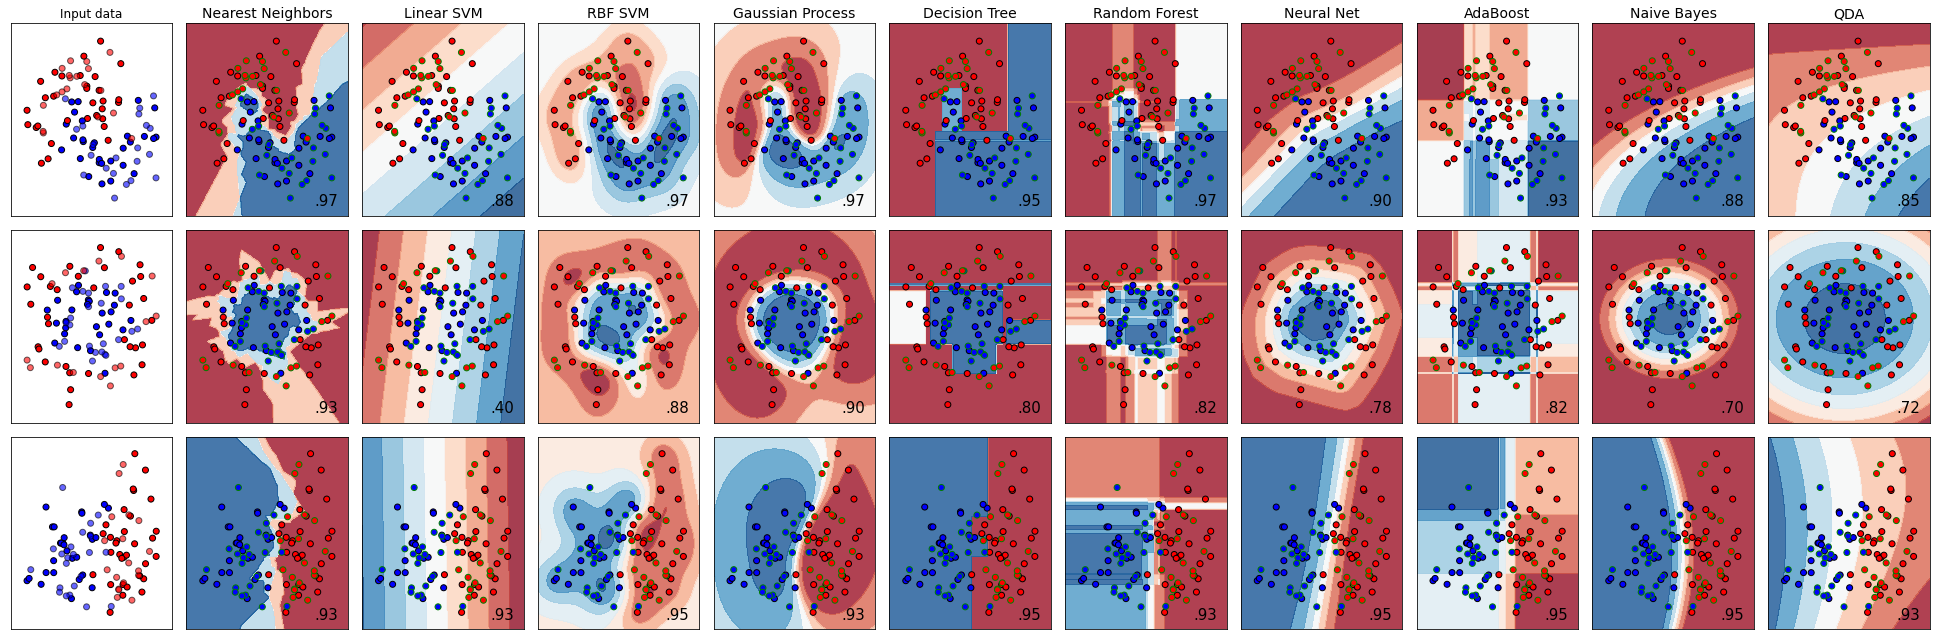

In [33]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9), facecolor = 'w')
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='green', alpha=1, zorder = 10)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize = 14)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

## Plotting the results of the prediction

In [3]:
# make the linearly separable data (the first row)

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


In [6]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [7]:
X

array([[-0.17749658,  0.93049627],
       [ 1.97742406,  1.76615529],
       [ 1.80002379,  1.7003428 ],
       [-0.77083686,  2.35916348],
       [-0.30800901,  1.59406316],
       [ 0.61472141,  2.43489824],
       [ 1.0909431 ,  2.21663402],
       [-0.83488954,  2.35868875],
       [ 2.47946499,  1.33418967],
       [ 1.19926597,  1.82681392],
       [ 2.18506184,  0.8226875 ],
       [ 1.68423203,  1.0411311 ],
       [ 1.14621135,  2.07048527],
       [ 1.35596945,  0.56802498],
       [ 1.38520748,  1.82607238],
       [ 1.86729217,  1.18692699],
       [ 0.31227376,  2.24605353],
       [-0.08183484,  1.70065511],
       [ 0.90484472,  2.60683016],
       [-0.4358609 ,  2.0151414 ],
       [ 0.81441196,  2.13546784],
       [ 3.10874312,  2.26786504],
       [-0.25574217,  1.71281146],
       [ 1.88663027,  2.72089513],
       [ 2.29503547,  3.89267759],
       [-0.11415626,  0.85593357],
       [ 1.69703537,  3.47717799],
       [ 1.83855775,  0.92667213],
       [ 1.60298807,

### **Q** What are X and y?
Explain in relation to the plot above.

X contains the x and y coordinates of the points, while y is a binary factor which states whether a point is blue or red. 

The classification creates a prediction in the 2D space of the data of what the expected value is, blue or red. To plot this we need to define a grid of data we can apply classification result to. This is done using meshgrid. Meshgrid creates a grid of x,y data, similar to np.arange, but in 2D

In [8]:
# reminder about numpy arange: syntax is start, stop, stride
np.arange(1,20,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

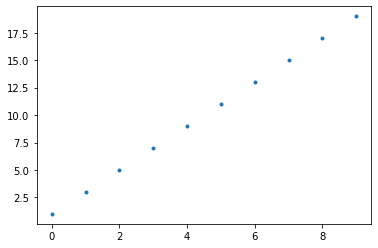

In [9]:
plt.plot(np.arange(1,20,2),'.')  # plotting dots for each data point
#  what is the x-axis here?

Meshgrid takes two arrays and makes a grid of values:

In [10]:
np.meshgrid(np.arange(1,20,2), np.arange(1,20,2))

[array([[ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]]),
 array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
        [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
        [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
        [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
        [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
        [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
        [15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
        [17, 17, 17, 17, 17, 17, 17, 17, 17, 17],
        [19, 19, 19, 19, 19, 19, 19, 19, 19, 19]

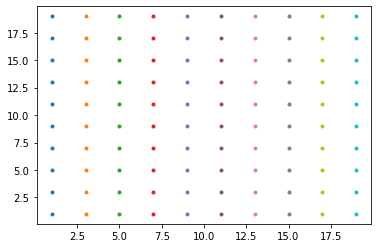

In [11]:
x1, y1 = np.meshgrid(np.arange(1,20,2), np.arange(1,20,2))
plt.plot(x1,y1, '.');

We can use the meshgrid output to define a 2D function for plotting. 

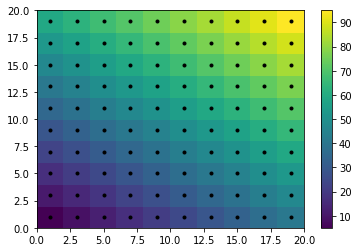

In [12]:
x1, y1 = np.meshgrid(np.arange(1,20,2), np.arange(1,20,2))
plt.plot(x1,y1, 'k.')
plt.pcolormesh(x1,y1, 2*x1 +3*y1, shading = 'auto') # what is this the equation of?
plt.colorbar()


### Q: Define a meshgrid over -1 to 1 with ~100 points and plot the function $z = x^2 + y^2$

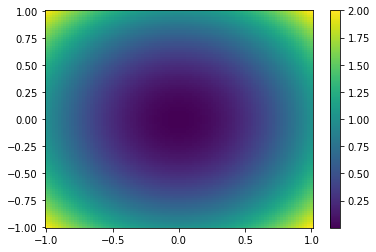

In [15]:
x2,y2 = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

plt.pcolormesh(x2,y2,x2**2+y2**2, shading = "auto")
plt.colorbar()

Back to the code:

In [17]:
# set the min and max of x and y based on the dataset
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# use the above to define the meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

The different methods either have a probablity that the x,y in question is red or blue, or a decision boundary

In [18]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Note that kneighbors does not have a decision_function, so we are using predict_proba. This is the probability that each point in the meshgrid is in either the red class (zeros) or the blue class (ones)

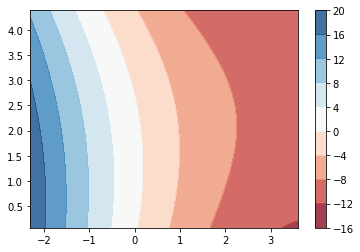

In [19]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

Now we will add in the training and testing points, and see how well the method did to predict the latter

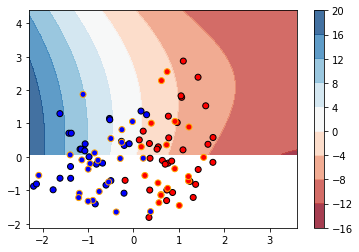

In [20]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

# Lab 13.2

**E.1** What does plt.tight_layout() in the sample code do?

In [22]:
plt.tight_layout?

It adjusts the padding between and around the subplots, the area between the figure edge and the edges of the subplots

**E.2** You will be assigned a column in the above using one of the other methods. Go through the same exercise as above for each of the three different datasets. Research how your method works. On Monday, you and your partner will explain to the class the basics of what your method does, and how well it works for the dataset, and what other applications it can be used for.

#### Moons

In [40]:
clf = classifiers[2]
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)


X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
#rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
#linearly_separable = (X, y)
#######################################

X,y = datasets[0]#choose moons dataset

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


########################################
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    



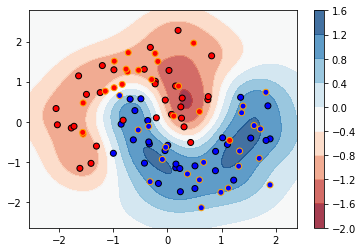

In [41]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

#### circles 

In [44]:
clf = classifiers[2]
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)


X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
#rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
#linearly_separable = (X, y)
#######################################

X,y = datasets[1]#choose circles dataset

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


########################################
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    


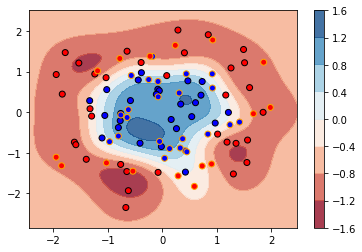

In [45]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

#### Linearly Separable 

In [48]:
clf = classifiers[2]
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)


X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
#rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
#linearly_separable = (X, y)
#######################################

X,y = datasets[2]#choose linear dataset

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


########################################
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    


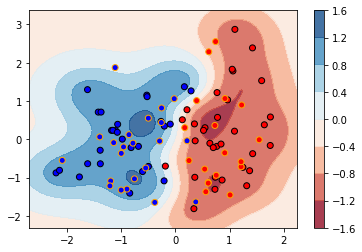

In [49]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

**E.3** Watch the SEEMS seminar on machine learning from earlier this term by Scott James: https://www.utrgv.edu/seems/news/seminars/index.htm

**E.3a** What different methods of machine learning were mentioned and used in this presentation?

**E.3b** What applications were these methods applied to? What was the result?

### 3a and 3b

AlphaGo Zero - used to predict chess moves

Unsupervised learning vs supervised learning 

SWAN - inputs to a differential equation/ nonlinear mapping - used to populate wave characteristics - wave height, period and direction were able to be predicted except in a buoy surrounded by land

Artificial Neural Networks - information processing nodes organized into layers 

Surface Water Identification - identify surface water features that pipelines would intercept - developed a convolutional neural network (CNN) to classify image pixels as water or not water - was able to correctly identify water bodies, even as small as swimming pools, there were a couple of mistakes - also used to classify potential streams from slope analysis

Predicting Geologic Facies from Wireline Data - estimate soil moisture from temp,prec data, running through machine learning can make predicting soil moisture faster - pretty accurate model 

**E.4** Research how machine learning has been used in your field of reserch and report on what you found. 

    Machine learning can be used along with remote sensing to classify land types, cover of trees, or detect features of interest. 
    It has been used in climate pattern recognition, precipitation estimates, estimating PM2.5 air pollution, and in studying flow in porous media. 


**E.5** How else could machine learning be used for your field of research?

I think it would be interesting to see how machine learning can be used with remote sensing to detect contaminants in soil, or leaks of pollutants, such as leaking oil or leaking methane from landfills. 